# Section 4.2 Distance and inner-product random kernel matrices

This page contains simulations in Section 4.2.

## Contents

    - Classification of two nested balls with distance and inner-product kernels


## Classification of two nested balls with distance and inner-product kernels

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
pi = np.pi

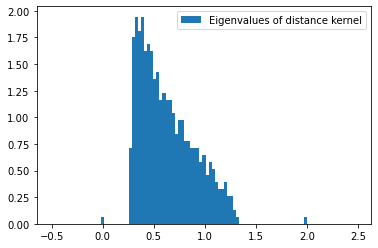

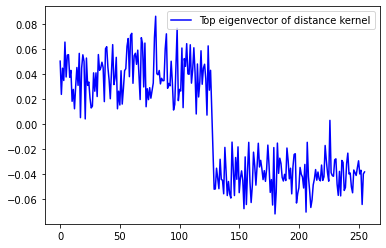

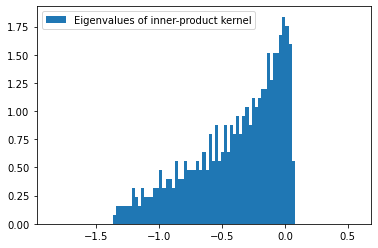

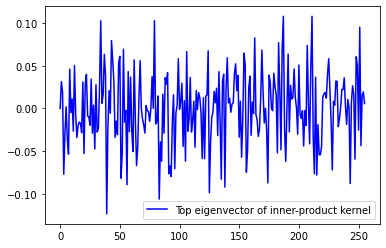

In [15]:
coeff = 4
p = 256*coeff
n = 128*coeff

cs = np.array([1/2,1/2])
k = len(cs); # nb of classes

testcase_option = 'var'

if testcase_option == 'means':
    means = lambda i : 5*np.concatenate([np.zeros(i-1),[1],np.zeros(p-i)])
    covs  = lambda i : np.eye(p)

if testcase_option == 'var':
    means = lambda i : np.zeros(p)
    covs  = lambda i : (1+(-1)**int(i)/np.sqrt(p)*5)*np.eye(p)

if testcase_option == 'orth':
    means = lambda i : np.zeros(p)
    covs  = lambda i : np.linalg.toeplitz([(4*(i-1)/10)**j for j in range(p)])

if testcase_option == 'mixed':
    means = lambda i : np.concatenate([-np.ones(p//2),np.ones(p//2)])/np.sqrt(p)
    covs  = lambda i : (1+(i-1)/np.sqrt(p)*10)*np.eye(p)

np.random.seed(928)
W=np.zeros((p,n))
for i in range(k):
    W[:,int(np.sum(cs[:i])*n):int(np.sum(cs[:i+1])*n)]=scipy.linalg.sqrtm(covs(i))@np.random.randn(p,int(cs[i]*n))

X=np.zeros((p,n))
for i in range(k):
    X[:,int(np.sum(cs[:i])*n):int(np.sum(cs[:i+1])*n)]=W[:,int(np.sum(cs[:i])*n):int(np.sum(cs[:i+1])*n)]+means(i).reshape(p,1)

P = np.eye(n) - np.ones((n,n))/n
X_center = X@P
XX = X_center.T@X_center

f = lambda t : np.exp(-t/2)
K1 = f((-2*XX+np.diag(XX).reshape(n,1)+np.diag(XX).reshape(1,n))/p)
K2 = f(XX/p)

eigs_K1,V1 = np.linalg.eig(P@K1@P)
eigs_K2,V2 = np.linalg.eig(P@K2@P)
ind = np.argsort(eigs_K1)
eigs_K1 = eigs_K1[ind]
V1 = V1[:,ind]
ind = np.argsort(eigs_K2)
eigs_K2 = eigs_K2[ind]
V2 = V2[:,ind]

plt.figure()
edges = np.linspace(np.min(eigs_K1)-.5,np.max(eigs_K1)+.5,100)
plt.hist(eigs_K1,bins=edges,weights=1/n/(edges[1]-edges[0])*np.ones(len(eigs_K1)),label='Eigenvalues of distance kernel')
_ = plt.legend()

plt.figure()
plt.plot(V1[::2,-1],'b',label='Top eigenvector of distance kernel')
_ = plt.legend()

plt.figure()
edges = np.linspace(np.min(eigs_K2)-.5,np.max(eigs_K2)+.5,100)
plt.hist(eigs_K2,bins=edges,weights=1/n/(edges[1]-edges[0])*np.ones(len(eigs_K2)),label='Eigenvalues of inner-product kernel')
_ = plt.legend()

plt.figure()
plt.plot(V2[::2,-1],'b',label='Top eigenvector of inner-product kernel')
_ = plt.legend()